IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-04</tt> et rajouter à la suite de <tt>tme-04</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-04-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

In [24]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Création d'une librairie

<div class="alert alert-block alert-success">

Afin de pouvoir réutiliser les classes et fonctions écrites précédemment dans les séances de TDTME, vous allez construire une librairie avec vos fonctions.

Cette librairie, qui s'appellera IADS, contiendra toutes les classes et fonctions que vous allez développer lors de vos séances de TDTME. Elle sera construite donc séance après séance par l'ajout des nouvelles classes et fonctions que vous écrirez.

<font color="RED">Important:</font> dans un premier temps, vous devez écrire les classes et fonctions demandées dans le notebook de la séance de TDTME courante. A la séance suivante, ou une fois que tout fonctionne correctement, vous rajouterez les classes et fonctions écrites et testées dans vos fichiers de la librairie IADS pour pouvoir réutiliser vos classifieurs par la suite dans les séances suivantes.

Récupérer et désarchiver l'archive iads.tgz de telle sorte que le répertoire `iads` soit un répertoire frère du répertoire `tme04`.

Ainsi, vous devrez avoir une arborescence qui ressemble à ça:

    - LU3IN026/
        - tme-01/
            - tme-01.ipynb
        - tme-02/
            - tme-02.ipynb
        - tme-03/
            - tme-03.ipynb
        - tme-04/
            - tme-04.ipynb
        - iads/
            - Classifiers.py
            - utils.py
            - evaluation.py
            - __init__.py
          

<b>Important</b> :
- ce fichier tme-04.ipynb doit toujours rester dans le répertoire tme-04/
- pour ouvrir les fichiers python (extension .py) qui se trouvent dans le répertoire iads/ il est nécessaire d'utiliser un éditeur de texte comme emacs, gedit, idle,...
</div>

<font color="RED" size="+1">**[Q]**</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Pour compléter ces fichiers, reprendre le code écrit dans les TDTME précédents.
- dans `utils.py`: `genere_dataset_uniform`, `genere_dataset_gaussian`, `plot2DSet`, `plot_frontiere` et `create_XOR`
- dans `Classifiers.py`: reprendre le code des classifiers que vous avez déjà définis.

<font color="RED" size="+1">**[Q]**</font> **Mise à jour de la librairie `iads`**

En premier lieu, vérifier que votre librairie `iads` est bien à jour : elle doit maintenant contenir toutes les fonctions et classes que mises au point et testées dans les séances précédentes. Une fois à jour, importer la librairie pour pouvoir l'utiliser dans ce notebook:

In [25]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

<b>Attention:</b> à partir d'ici, lorsque vous voulez utiliser un algorithme qui se trouve dans le fichier `Classifier.py` il est nécessaire de préfixer son nom par `classif.` et pour utiliser une fonction du fichier `utils.py`, il faut préfixer le nom de la fonction par `ut.`


Dans les boîtes qui vont suivre, on appliquera ce principe.

Taille du dataset généré : (200, 2) exemples


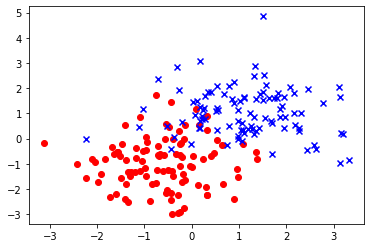

In [26]:
# REMARQUE: une fois les importations faites, les fonctions de utils sont utilisables
#  en mettant ut. devant leur nom:

# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

d_desc_gauss, d_lab_gauss = ut.genere_dataset_gaussian(np.array([1,1]) ,np.array([[1,0],[0,1]]), \
                                                       np.array([-0.5,-1]), np.array([[1,0],[0,1]]), \
                                                       100)

print("Taille du dataset généré :", np.shape(d_desc_gauss), "exemples")

# Affichage :
ut.plot2DSet(d_desc_gauss,d_lab_gauss)

Accuracy :  0.9


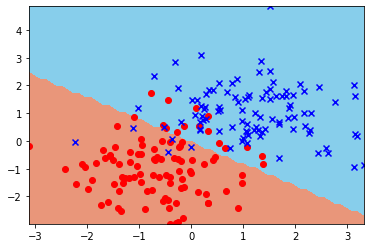

In [27]:
data = d_desc_gauss
label = d_lab_gauss

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

# De même, les classes de Classifiers sont utilisables en mettant classif. devant leur nom:
# Création d'un perceptron
perceptron1 = classif.ClassifierPerceptron(2, learning_rate=0.01, init=True)

perceptron1.train(data, label)
print("Accuracy : ", perceptron1.accuracy(data,label))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(data,label,perceptron1,step=60)
ut.plot2DSet(data,label)

Voilà, à partir de maintenant, vous pourrez donc ainsi réutiliser dans vos notebooks des classes et des fonctions écrites précédemment sans avoir à recopier tout le code implémenté !

Dans les prochains notebooks, vous mettrez au point les fonctions et classes demandées et une fois qu'elles seront au point et validées, vous pourrez les transférer dans votre librairie IADS pour pouvoir les réutiliser dans les séances suivantes.

<font color="RED" size="+1">**[Q]**</font> Pour étudier la convergence du perceptron, on a besoin de garder une trace de tous les poids $w$ qui ont été utilisés. Pour cela, rajouter à la classe `ClassifierPerceptron` un attribut de nom `allw` qui est initialisé aux poids initiaux dans `__init__` par:

    self.allw =[self.w.copy()] # stockage des premiers poids
        
cet attribut est à mettre jour pendant l'entraînement `train_step` du perceptron, après le changement de valeur des poids. 

<b>Remarque</b>: attention ! pour copier le vecteur $w$ penser à faire une copie profonde...


Ajouter aussi dans la classe un accesseur `get_allw()` pour récupérer la valeur de `allw`.


[0.004887398095808137]
31


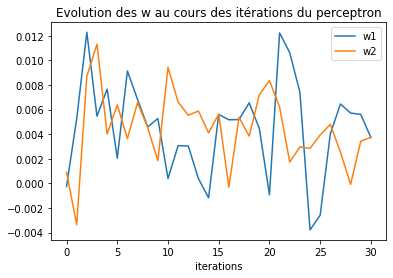

In [28]:
# A utiliser une fois la classe ClassifierPerceptron modifiée par l'ajout de allw

# Paramètres pour le perceptron:
dim = 2
eps = 5e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

perceptron2 = classif.ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron2.train(data, label,niter_max=100)
print(les_differences)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron2.get_allw()) 
print(len(allw))

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Sauvegarde de la figure obtenue (décommenter la ligne ci-dessous):
#plt.savefig('out/cvg.png')

## Compléments sur le perceptron

<div class="alert alert-block alert-info">

Afin d'améliorer notre classifieur perceptron, nous allons considérer une version modifiée de la classe `ClassifierPerceptronBiais`, que nous appellerons `ClassifierPerceptronBiais` pour construire un perceptron en utilisant un <b>biais</b> qui facilite la convergence du modèle: pour déterminer si une mise à jour des poids doit être faite, le critère de mauvaise classification est remplacé par
$$ f(\mathbf x_i) y_i < 1 $$
où $f(\mathbf x_i)$ est le score obtenu pour $x_i$.

<b>Idée</b>: on veut que $f(\mathbf x_i)$ et $y_i$ soient du même signe ET que $f(\mathbf x_i)$ soit suffisamment grand (en valeur absolue).
    
C'est une version dite *stabilisée* du perceptron où les points ne sont considérés bien classés que lorsque $f(\mathbf x_i) y_i \geq 1$. Dans le cas contraire, on met à jour les poids.

La mise à jour des poids tient alors compte de ce biais: $$ w = w +\epsilon (y_i- f(\mathbf x_i))x_i.$$

</div>    
    


<font color="RED" size="+1"><b>[Q]</b></font> Ecrire la classe `ClassifierPerceptronBiais` (tout d'abord dans une boîte de ce notebook, puis vous la copierez dans votre fichier `Classifiers.py`) et tester le code suivant qui doit être fonctionnel. 

Pour éviter d'avoir à récrire les fonctions déjà écrites pour le perceptron et qui ne changeront pas dans le cas du perceptron avec biais, on fait hériter la classe `ClassifierPerceptronBiais` de la classe `ClassifierPerceptron`.


In [29]:
# ------------------------ A COMPLETER :

# Remarque : quand vous transférerez cette classe dans le fichier classifieur.py 
# de votre librairie, il faudra enlever "classif." en préfixe de la classe ClassifierPerceptron:

class ClassifierPerceptronBiais(classif.ClassifierPerceptron):
    """ Perceptron de Rosenblatt avec biais
        Variante du perceptron de base
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        self.allw = []
        if (init == 0): 
            self.w = np.zeros(input_dimension)
        elif (init == 1): 
            self.w = 0.001 * (2 * np.random.uniform(0, 1, input_dimension) - 1)
        self.allw.append(self.w.copy())
        
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        ### A COMPLETER !
        # Ne pas oublier d'ajouter les poids à allw avant de terminer la méthode
        index_list =[i for i in range(len(desc_set))]
        np.random.shuffle(index_list)
        for i in (index_list):
            Xi, Yi = desc_set[i,:], label_set[i]
            y_hat = np.dot(self.w, Xi)
            if (y_hat*Yi<1):    # Il y a erreur, donc correction
                self.w += self.learning_rate*np.dot(Xi,Yi)
                self.allw.append(self.w.copy())
        #raise NotImplementedError("Vous devez implémenter cette méthode !")

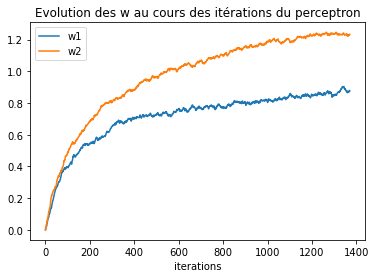

In [30]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = 2
eps = 5e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Création et entraînement du perceptron sur les données générées

# -------------------------------
#### ATTENTION : commenter la ligne qui correspond à votre cas :

## La classe ClassifierPerceptronBiais a été mise dans Classifier.py :
#perc = classif.ClassifierPerceptronBiais(dim, eps)

## La classe ClassifierPerceptronBiais se trouve dans ce notebook :
perceptron_biais = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)
# -------------------------------

les_differences = perceptron_biais.train(data, label)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron_biais.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Sauvegarde de la figure obtenue (décommenter la ligne ci-dessous):
# et créer un répertoire out/ dans le répertoire tme04
# puis aller dans le répertoire `out` avec un navigateur de fichiers (ou par le terminal)
# pour visualiser l'image obtenue par :

# plt.savefig('out/cvg.png')

<b>Remarque</b>: dans ce qui suit, on considére que la classe `ClassifierPerceptronBiais` se trouve dans ce notebook, pensez à corriger si vous avez déplacé votre classe dans `Classifiers.py` de votre librairie IADS.

# Lien avec l'optimisation des fonctions de coût

Après ces rappels de code, nous entrons maintenant dans le vif du sujet !

<div class="alert alert-block alert-info">
    
L'évolution des poids du perceptron correspond en réalité à l'optimisation de la fonction coût suivante (cela sera développé en cours):

$$ \mathcal C = \sum_{i=1}^N [1- f(\mathbf x_i) y_i]_+, \qquad \mbox{avec: } 
[\alpha]_+ = \left\{\begin{array}{ll}
\alpha & \mbox{ si } \alpha >0\\
0 & \mbox{ sinon }
\end{array}\right.$$

Nous utilisons ici une version *stabilisée* du perceptron où les points ne sont bien classé que lorsque 
$f(\mathbf x_i) y_i>1$

Le perceptron est une simple descente de gradient.

Deux questions se posent alors :
1. Quelle est l'évolution de $\mathcal C$ au cours des itérations ?
1. Quel chemin de variations prennent les $w$ dans le cas 2D ?
    
</div>    

<font color="RED" size="+1">**[Q]**</font> Donner les instructions qui permettent de tracer l'évolution du coût $ \mathcal C$ au cours des itérations lors de l'apprentissage précédent. Pour cela, vous utiliserez les valeurs de $w$ sauvegardées lors de l'apprentissage.

In [31]:
# Toujours avec les mêmes données :
X = data
Y = label

# on considère les poids de perceptron_biais généré dans une boite précédente:
allw = np.array(perceptron_biais.get_allw()) 

# ------------------------  A COMPLETER :
def costcalcul(ensemble):
    """ensemble est une liste de vecteur"""
    cost=[]
    for i in range(len(ensemble)):
        w=ensemble[i].copy()
        y_i=np.dot(X,w)
        C=np.multiply(Y,y_i)
        C=np.ones(200)-C
        C[C <= 0] = 0
        cost.append(np.sum(C))
    
    return cost
        

# ------------------------ 
# Sauvegarde de la figure obtenue (décommenter la ligne ci-dessous):
#plt.savefig('out/cost.png')

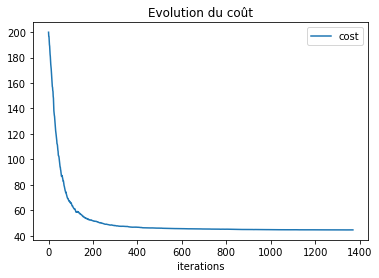

In [32]:


# Tracé de l'évolution du cout:
cost = costcalcul(allw)
plt.figure()
plt.plot(cost) # première coordonnée du vecteur poids: w1
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend(['cost'])



In [33]:
allw[0:5]

array([[0.00046399, 0.00019732],
       [0.00137288, 0.01565925],
       [0.00688142, 0.01139786],
       [0.01556617, 0.02300015],
       [0.0169957 , 0.03422884]])

### Evolution des poids dans l'espace des paramètres

Le code pour étudier l'évolution des poids dans l'espace des paramères est presque entièrement donné ci-dessous... Sauf une ligne critique !

<b>Remarque</b>: il faut absolument comprendre la signification du code et de l'image produite.


(900,) (30, 30)


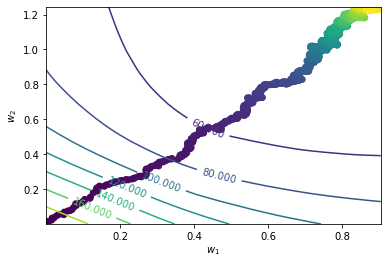

In [34]:
# Evolution des poids dans l'espace des paramètres
# le code est presque entièrement donné... Sauf une ligne critique
# Il faut absolument comprendre la signification du code et de l'image produite

# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# 2. Evaluation du cout pour toutes ces solutions potentielles

##########
# LIGNE A COMPLETER:
# construction de res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

# res = # <-------------------------- A COMPLETER  ---------------
res=np.asarray(costcalcul(grid))
#print(res)

print(res.shape, x1grid.shape)
##########

# remise en forme de res
res=res.reshape(x1grid.shape) 
#print(res)
fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw[:,0], allw[:,1], c=np.arange(len(allw)))

# Sauvegarde de la figure obtenue (décommenter la ligne ci-dessous):
#plt.savefig("out/espace_param.png")

La solution initiale $w=[0,0]$ correspond à un coût élevé. L'algorithme du perceptron fait évoluer les poids du modèle pour aller dans une zone de l'espace où le coût est moindre.

**ATTENTION** à ne pas confondre l'espace de représentation des points (où les axes sont $X_1,X_2$) et l'espace de représentation des paramètres (ici, où chaque point correspond à un classifieur associé à un niveau de coût).

# Validation Croisée

Dans le but d'évaluer un classifier, nous avons vu dans le TME 3 qu'il était important de posséder un ensemble de données de test, différent de l'ensemble d'apprentissage.

Nous allons voir maintenant une méthode encore plus efficace pour bien évaluer un algorithme.

<div class="alert alert-block alert-info">

La procédure de la <b>validation croisée</b> (ou <i>cross validation</i>) est au centre de la plupart des applications de machine learning: il est temps pour nous de travailler sur une implémentation.

L'idée est de concevoir la fonction suivante:
```
Xapp,Yapp,Xtest,Ytest = crossval(X, Y, n_iterations, iteration)
```
- ```X, Y``` sont les données du dataset **mélangées aléatoirement**
- ```n_iterations``` est le nombre d'ensembles de test au total.
- ```iteration``` est l'itération concernée: on ne renvoit pas les mêmes données en fonction des itérations.

Après séparation des indices en ```n_iterations``` groupes, isoler 1 groupe pour le test et les autres pour l'apprentissage.


<b>Remarques:</b>
- on fait l'hypothèse que le dataset (`X`, `Y`) garde toujours le même ordre entre 2 appels de `crossval` successif avec des valeurs d'itération différentes.
- cette fonction ne doit pas mélanger les données du dataset fourni (qui doit être mélangé au préalable), elle sert juste à extraire de ce dataset 2 sous-datasets: un dataset d'apprentissage (`Xapp`, `Yapp`) et un dataset de test (`Xtest`, `Ytest`).
- elle extrait les datasets demandés comme suit:
    - le dataset de test pour l'itération $i$ contient les exemples du dataset $X$ dont les indices vont de $i\frac{len(X)}{n}$ à  $(i+1)\frac{len(X)}{n}-1$ (avec $n$ le nombre d'itérations `n_iterations` fixé).
    - le dataset d'apprentissage pour l'itération $i$ contient les exemples du dataset $X$ contient les exemples qui ne sont pas dans le dataset de test.

</div>    
    
**Note** Pour mélanger les données au départ, avant le premier appel de `crossval`, vous pouvez utiliser les commandes suivantes:
```
index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

# check: malgré le mélange, les données doivent être les mêmes
plt.figure()
plt.scatter(Xm[Ym==1,0], Xm[Ym==1,1], c='b')
plt.scatter(Xm[Ym==-1,0], Xm[Ym==-1,1], c='r')
```


<font color="RED" size="+1">**[Q]**</font> Donner la définition de la fonction `crossval` telle qu'elle est décrite.

In [35]:
def crossval(X, Y, n_iterations, iteration):
    #############
    # A COMPLETER
    #############    
    taille_bloc = len(Y)//n_iterations
    start = iteration*int(len(Y)/n_iterations) 
    end =(iteration+1)*int(len(Y)/n_iterations)
    
    Xapp, Yapp = np.delete(X,np.s_[start:end],axis=0), np.delete(Y,np.s_[start:end],axis=0)
    Xtest, Ytest = X[start:end], Y[start:end]
    return Xapp, Yapp, Xtest, Ytest




Regarder l'exemple d'utilisation suivant, sur un dataset jouet, pour comprendre comment sont pris les exemples à chaque appel différent.

In [36]:
# Pour vérifier que le traitement est bien réalisé et que tout marche bien 
# en particulier (très important !) que le lien entre descriptions X et classes Y n'est pas perdu,
# on peut regarder ce qui se passe si X et Y sont les mêmes:

N = 24  # Nombre d'exemples dans le dataset
Xjouet = np.array([i for i in range(0,N)])   
Yjouet = Xjouet  # Yjouet est identique à Xjouet

niter = 4
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xjouet, Yjouet, niter, i)
    print("========== ITERATION : ",i," ==========")
    print(" Xapp=", Xapp.T,"\n","Yapp=", Yapp,"\n","Xtest=",Xtest.T,"\n","Ytest=", Ytest)
    
    
print("\n*********************\nEt on peut rappeler la fonction avec 0 par exemple: ")    
Xapp,Yapp,Xtest,Ytest = crossval(Xjouet, Yjouet, niter, 0)
print(" Xapp=", Xapp.T,"\n","Yapp=", Yapp,"\n","Xtest=",Xtest.T,"\n","Ytest=", Ytest)


========== ITERATION :  0  ==========
 Xapp= [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 
 Yapp= [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 
 Xtest= [0 1 2 3 4 5] 
 Ytest= [0 1 2 3 4 5]
========== ITERATION :  1  ==========
 Xapp= [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23] 
 Yapp= [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23] 
 Xtest= [ 6  7  8  9 10 11] 
 Ytest= [ 6  7  8  9 10 11]
========== ITERATION :  2  ==========
 Xapp= [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23] 
 Yapp= [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23] 
 Xtest= [12 13 14 15 16 17] 
 Ytest= [12 13 14 15 16 17]
========== ITERATION :  3  ==========
 Xapp= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 
 Yapp= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 
 Xtest= [18 19 20 21 22 23] 
 Ytest= [18 19 20 21 22 23]

*********************
Et on peut rappeler la fonction avec 0 par exemple: 
 Xapp= [ 6  7  8  9 10 11 12 13 14 15 16 17 

<font color="RED" size="+1">**[Q]**</font> En fait, pour faire les choses correctement, il faut que la séparation des ensembles train/test respecte la distribution des classes dans le dataset de départ. Ecrire la fonction `crossval_strat` qui effectue la même chose que la fonction précédente mais en respectant la distribution des classes. La solution passe par un découpage qui s'effectue par classe.


In [37]:
# code de la validation croisée (version qui respecte la distribution des classes)

def crossval_strat(X, Y, n_iterations, iteration):
    
    
    index_neg, = np.where(Y == -1)
    index_pos, = np.where(Y == 1)
    
    
    index_pos_test=index_pos[iteration*(len(index_pos) // n_iterations): (iteration+1)*len(index_pos)//n_iterations]
    index_neg_test=index_neg[iteration*(len(index_neg) // n_iterations): (iteration+1)*len(index_neg)//n_iterations]
    
    X_Test=np.concatenate((X[index_neg_test],X[index_pos_test]))
    Y_Test=np.concatenate((Y[index_neg_test],Y[index_pos_test]))
    
    index_train=[i for i in range(len(X)) if ((i not in index_pos_test) and (i not in index_neg_test))]
    
    X_Train=X[index_train]
    Y_Train=Y[index_train]
    
    return X_Train,Y_Train,X_Test,Y_Test


In [38]:
# Exemple d'utilisation avec un dataset jouet (1 Dimension)
N = 24  # Nombre d'exemples dans le dataset
#Xtoy = np.arange(N).reshape(N,1)
Xtoy = np.array([i for i in range(0,N)])   
Ytoy = np.array([-1]*(N//2) + [1]*(N//2))
#index = np.random.permutation(len(Xtoy)) # mélange des index
#XtoyMelange = Xtoy[index]
#YtoyMelange = Ytoy[index]

niter = 3
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xtoy, Ytoy, niter, i)
    print("========== ITERATION : ",i," ==========")
    print(" Xapp=", Xapp.T,"\n","Yapp=", Yapp,"\n","Xtest=",Xtest.T,"\n","Ytest=", Ytest)

========== ITERATION :  0  ==========
 Xapp= [ 4  5  6  7  8  9 10 11 16 17 18 19 20 21 22 23] 
 Yapp= [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1] 
 Xtest= [ 0  1  2  3 12 13 14 15] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  1  ==========
 Xapp= [ 0  1  2  3  8  9 10 11 12 13 14 15 20 21 22 23] 
 Yapp= [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1] 
 Xtest= [ 4  5  6  7 16 17 18 19] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  2  ==========
 Xapp= [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] 
 Yapp= [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1] 
 Xtest= [ 8  9 10 11 20 21 22 23] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]


**Remarque**: il est important, avant d'utiliser `crossval` ou `crossval_strat` de mélanger le dataset. Ce mélange aléatoire doit être fait une seule fois avant le premier appel de la fonction (et jamais entre 2 appels).

In [39]:
np.random.seed(42)   # on prend 42 comme graine

# Exemple d'utilisation avec un dataset jouet (1 Dimension)
N = 24  # Nombre d'exemples dans le dataset
Xtoy = np.array([i for i in range(0,N)])   
Ytoy = np.array([-1]*(N//2) + [1]*(N//2))
index = np.random.permutation(len(Xtoy)) # mélange des index
XtoyMelange = Xtoy[index]
YtoyMelange = Ytoy[index]

niter = 3
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(XtoyMelange, YtoyMelange, niter, i)
    print("========== ITERATION : ",i," ==========")
    print(" Xapp=", Xapp.T,"\n","Yapp=", Yapp,"\n","Xtest=",Xtest.T,"\n","Ytest=", Ytest)

========== ITERATION :  0  ==========
 Xapp= [ 1  5  2 12 15  3  4 22 17 20 23  7 10 14 19  6] 
 Yapp= [-1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1] 
 Xtest= [ 8  0 11  9 16 18 13 21] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  1  ==========
 Xapp= [ 8 16  0 18 11  9 13 21  4 20 23  7 10 14 19  6] 
 Yapp= [-1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1] 
 Xtest= [ 1  5  2  3 12 15 22 17] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  2  ==========
 Xapp= [ 8 16  0 18 11  9 13  1 21  5  2 12 15  3 22 17] 
 Yapp= [-1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1] 
 Xtest= [ 4  7 10  6 20 23 14 19] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]


## Tests de la procédure de validation croisée 

Sur des données réelles et sur des données jouets


In [40]:
np.random.seed(42)   # on prend 42 comme graine
# test sur les données jouet X, Y supposées pré-existantes

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]
niter = 10
perf = []

# Paramètres pour le perceptron:
dim = 2
eps = 1e-3    # learning rate
poids_0 = 0   # valeur initiale des poids à 0

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    perceptron4 = ClassifierPerceptronBiais(dim, eps, poids_0)
    perceptron4.train(Xapp, Yapp)
    perf.append(perceptron4.accuracy(Xtest, Ytest))
    
print("Perf ",perf)

Perf  [0.85, 1.0, 0.95, 0.9, 0.85, 0.85, 0.9, 0.8, 0.95, 0.9]


<font color="RED" size="+1">**[Q]**</font> Tester la validation croisée sur les données USPS.

In [47]:
# test sur les données USPS
import pickle as pkl

data = pkl.load(open('ressources/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)

# Création d'un sous groupe de données
c1 = 4  # ---> sera associée au label +1  
c2 = 6  # ---> sera associée au label -1
X12 = Xu[(Yu==c1) | (Yu==c2)]
Y12 = np.where(Yu[(Yu==c1) | (Yu==c2)]==c1, 1, -1)

np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = X12.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = 0   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10
# Liste pour stocker les taux de bonne classification à chaque itération
perf = []

# ######################## A COMPLETER CI-DESSOUS
# 1) mélanger des exemples 

# 2) réaliser une validation croisée complète 

# ------------------------ 

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X12, Y12, nb_iter, i)
    perceptron4 = ClassifierPerceptronBiais(dim, eps, poids_0)
    perceptron4.train(Xapp, Yapp)
    perf.append(perceptron4.accuracy(Xtest, Ytest))
    print("Itération",i,": taille base app =",Xapp.shape[0], "taille base test=",Xtest.shape[0],"Taux de bonne classif:",perf[i])
    
print("Perf obtenues : ",perf)

Itération 0 : taille base app = 1008 taille base test= 111 Taux de bonne classif: 0.9819819819819819
Itération 1 : taille base app = 1007 taille base test= 112 Taux de bonne classif: 1.0
Itération 2 : taille base app = 1007 taille base test= 112 Taux de bonne classif: 0.9821428571428571
Itération 3 : taille base app = 1005 taille base test= 114 Taux de bonne classif: 1.0
Itération 4 : taille base app = 1004 taille base test= 115 Taux de bonne classif: 1.0
Itération 5 : taille base app = 1004 taille base test= 115 Taux de bonne classif: 0.9826086956521739
Itération 6 : taille base app = 1002 taille base test= 117 Taux de bonne classif: 0.9914529914529915
Itération 7 : taille base app = 1002 taille base test= 117 Taux de bonne classif: 1.0
Itération 8 : taille base app = 1001 taille base test= 118 Taux de bonne classif: 0.9915254237288136
Itération 9 : taille base app = 999 taille base test= 120 Taux de bonne classif: 0.975
Perf obtenues :  [0.9819819819819819, 1.0, 0.9821428571428571, 1

<font color="RED" size="+1">**[Q]**</font> Pour évaluer un classifieur, on regarde la moyenne et l'écart type de son taux de bonne classification lors d'une validation croisée.

Ecrire la fonction `analyse_perfs` qui prend en argument une liste de nombres réels (non vide) et renvoie le tuple constitué de la moyenne et de l'écart type de ces nombres.

**Remarque**: l'écart type donne une information sur la "robustesse" du modèle. Plus il est grand, est plus cela signifie que la performance du classifieur dépend du jeu d'apprentissage qui a servi à le construire.

In [48]:
# ------------------------ A COMPLETER
def analyse_perfs(L):
    """ L : liste de nombres réels non vide
        rend le tuple (moyenne, écart-type)
    """
    moyenne=sum(L)/len(L)
    
    ecart_type=0
    for pref in L:
        ecart_type=ecart_type+((pref-moyenne)*(pref-moyenne))
        
    return (moyenne,math.sqrt(ecart_type/len(L)))
    raise NotImplementedError("Vous devez implémenter cette fonction !")    


In [49]:
# Sur les résultats obtenus dans la boîte précédemment:
analyse_perfs(perf)

(0.9904711949958818, 0.008988173013746792)